In [2]:
import bosonic
import numpy as np
from scipy.linalg import block_diag
import matplotlib.pyplot as plt
import functools

## Gate Implement

The code to get single-photon unitary transformation `U`. There are three different approaches.

### Matrix from materials of Corlan, 2015

In [144]:
U = np.array([
    [0.476, -0.622, -0.440, 0.440, 0, 0],
    [-0.622, -0.476, 0, 0, 0.622, 0],
    [-0.383, 0, 0.293, 0.707, -0.383, -0.348],
    [0.383, 0, 0.707, 0.293, 0.383, 0.348],
    [0, 0.622, -0.440, 0.440, 0.476, 0],
    [0.306, 0, 0.166, -0.166, 0.306, -0.870]
])

U = block_diag(1, U)

### Code from Michael

In [134]:
r = np.sqrt([0, 0.227, 1 / 2, 1 / 2, 0.227, 1 / 2, 0.243, 1 / 2])
t = np.sqrt([1 - r[i] ** 2 for i in range(len(r))])

U = np.array([[1, 0, 0, 0, 0, 0, 0],
                 # c0
                 [0, r[1], -r[2] * t[1], -r[3] * t[2] * t[1], t[3] * t[2] * t[1], 0, 0],
                 # |1>
                 [0, -t[1] * r[5], -r[2] * r[1] * r[5] - t[2] * r[4] * t[5],
                  -r[3] * t[2] * r[1] * r[5] + r[3] * r[2] * r[4] * t[5],
                  +t[3] * t[2] * r[1] * r[5] - t[3] * r[2] * r[4] * t[5], t[4] * t[5], 0],
                 # c1
                 [0, -t[1] * t[5] * t[6] * t[7],
                  r[2] * r[1] * t[5] * t[6] * t[7] - t[2] * r[4] * r[5] * t[6] * t[7],
                  -r[3] * r[2] * r[4] * r[5] * t[6] * t[7] - r[3] * t[2] * r[1] * t[5] * t[6] * t[7] + t[3] * r[7],
                  t[3] * t[2] * r[1] * t[5] * t[6] * t[7] + r[3] * r[7] + t[3] * r[2] * r[4] * r[5] * t[6] * t[7],
                  -t[4] * r[5] * t[6] * t[7], -r[6] * t[7]],
                 # t1
                 [0, t[1] * t[5] * t[6] * r[7], r[2] * r[1] * t[5] * t[6] * r[7] - t[2] * r[4] * r[5] * t[6] * r[7],
                  +r[3] * t[2] * r[1] * t[5] * t[6] * r[7] + r[3] * r[2] * r[4] * r[5] * t[6] * r[7] + t[3] * t[7],
                  -t[3] * t[2] * r[1] * t[5] * t[6] * r[7] - t[3] * r[2] * r[4] * r[5] * t[6] * r[7] + r[3] * t[7],
                  t[4] * r[5] * t[6] * r[7], r[6] * r[7]],
                 # t0
                 [0, 0, t[2] * t[4], -r[3] * r[2] * t[4], t[3] * r[2] * t[4], r[4], 0],
                 # |1>
                 [0, t[1] * t[5] * r[6], r[2] * r[1] * t[5] * r[6] - t[2] * r[4] * r[5] * r[6],
                  r[3] * r[2] * r[4] * r[5] * r[6] + r[3] * t[2] * r[1] * t[5] * r[6],
                  -t[3] * t[2] * r[1] * t[5] * r[6] - t[3] * r[2] * r[4] * r[5] * r[6],
                  t[4] * r[5] * r[6], -t[6]]])
# |0>


In [172]:
U

array([[ 1.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j],
       [ 0.        +0.j,  0.47644517+0.j,  0.68864759+0.j,
         0.41576296+0.j,  0.57851039+0.j,  0.70852764+0.j,
         0.        +0.j],
       [ 0.        +0.j,  0.68864759+0.j,  0.11911129+0.j,
        -0.28764822+0.j, -0.40024606+0.j, -0.49019931+0.j,
         0.8434176 +0.j],
       [ 0.        +0.j,  0.59638631+0.j, -0.41261362+0.j,
        -0.04151844+0.j,  0.69222946+0.j, -0.68312661+0.j,
        -0.48694738+0.j],
       [ 0.        +0.j,  0.73042107+0.j, -0.50534642+0.j,
        -0.0508495 +0.j, -0.68312661+0.j,  0.41334419+0.j,
        -0.59638631+0.j],
       [ 0.        +0.j,  0.        +0.j,  0.8434176 +0.j,
        -0.33946904+0.j, -0.47235176+0.j, -0.57851039+0.j,
        -0.47644517+0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.97002629+0.j, -0.3485685 +0.j, -0.42690748+0.j,
         0.       

### My Implementation from figures and parameters from paper Corlan, 2015

In [56]:
def mzi(alpha, phi):
    return np.array([
        [np.exp(1j*phi) * np.sin(alpha/2), np.exp(1j*phi) * np.cos(alpha/2)],
        [np.cos(alpha/2), -np.sin(alpha/2)]
    ])


'''
    alpha_arr, phi_arr is taken from Supplementary Material S3.4
'''

alpha_arr = np.array([
    [0.992, 1.571, 4.957, 1.792, 0.],
    [0., 1.571, 0.992, 0., 0],
    [0., 0., 1.571, 0., 2.226],
    [0., 0., 0., 3.142, 0.],
    [0., 0., 0., 0., 0.]
])

phi_arr = np.array([
    [0., 4.712, 4.544, 5.375, 3.816],
    [0., 0., 1.571, 2.188, 4.712],
    [0., 0., 0., 5.498, 1.571],
    [0., 0., 0., 0., 3.142],
    [0., 0., 0., 0., 0.]
])

In [57]:
ordered_pairs = [ (i,j) for i in np.arange(5,1-1,-1) for j in np.arange(i,6,1) ]

'''
    Multiply matrices by order:
    (m-1,m-1),
    (m-2,m-2), (m-2,m-1),
    ...,
    (1,1), (1,2), ..., (1,m-1)
'''
U = np.linalg.multi_dot(
    [block_diag(
        np.eye(pair[1]-1),
        mzi(alpha_arr[pair[0]-1,pair[1]-1], phi_arr[pair[0]-1,pair[1]-1]),
        np.eye(5-pair[1])) for pair in ordered_pairs])
U = block_diag(1,U)

In [58]:
U

array([[ 1.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j],
       [ 0.00000000e+00+0.00000000e+00j,  4.75911382e-01+0.00000000e+00j,
        -2.41929830e-04-6.21958914e-01j, -3.77334368e-01+6.42974132e-02j,
         1.81380927e-01-3.36937712e-01j,  0.00000000e+00+0.00000000e+00j,
        -2.81686409e-01+1.19944689e-01j],
       [ 0.00000000e+00+0.00000000e+00j,  6.21958961e-01+0.00000000e+00j,
         4.41236191e-05+4.75911359e-01j, -1.45566454e-05-8.55799439e-05j,
         7.64018797e-05+4.11580054e-05j, -3.59795832e-01+5.07170943e-01j,
        -2.71833134e-05-6.38916928e-05j],
       [ 0.00000000e+00+0.00000000e+00j,  4.39746610e-01+0.00000000e+00j,
         9.97300928e-05-9.24035112e-09j, -1.49052375e-01-3.88321038e-01j,
        -2.62797925e-01+3.57644362e-01j,  2.54491808e-01-3.5

## Gate Evaluation

In [59]:
cnot_gate = bosonic.aa_phi(U.astype('complex'), 4)

In [60]:
cnot_inputs = np.array([[1, 1, 0, 1, 0, 1, 0],
                        [1, 1, 0, 0, 1, 1, 0],
                        [0, 1, 1, 1, 0, 1, 0],
                        [0, 1, 1, 0, 1, 1, 0]])

input_indices = np.ndarray(shape=(4, 1), dtype=int)
gate_basis = np.array(bosonic.fock.basis(4, 7))

for i in range(np.size(cnot_inputs, 0)):
        input_indices[i] = np.where((gate_basis == cnot_inputs[i]).all(axis=1))
        
inputs_fock = np.zeros((gate_basis.shape[0], 4), dtype='complex')

for i in range(4):
    inputs_fock[input_indices[i,0], i] = 1

In [61]:
cnot_outputs = cnot_gate.dot(inputs_fock)
cnot_output_probs = np.abs(cnot_outputs)[input_indices].T ** 2

In [62]:
cnot_outputs.shape, input_indices.shape

((210, 4), (4, 1))

Text(0.5, 0.9660000000000001, 'Heralded CNOT Gate Truth Table')

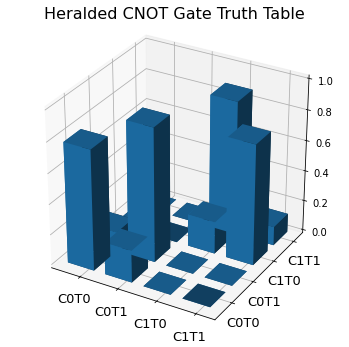

In [63]:
fig_cnot = plt.figure(figsize=(6,6))
ax1 = fig_cnot.add_subplot(111, projection='3d')
cnot_truth_table_plot = np.array(
    [cnot_output_probs[i,:]/np.sum(cnot_output_probs[i,:]) for i in range(4)]).ravel()

_x = np.arange(4)
_y = np.arange(4)
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()
labels = ['C0T0', 'C0T1', 'C1T0', 'C1T1']

top = 1
bottom = np.zeros_like(top)
width = depth = 0.7

ax1.bar3d(x, y, bottom, width, depth, cnot_truth_table_plot, shade=True)
ax1.set_xticks(np.arange(4)+1/2)
ax1.set_yticks(np.arange(4)+1/2)
ax1.set_xticklabels(labels,fontsize=13)
ax1.set_yticklabels(labels,fontsize=13)
# ax1.set_xlabel('Input',fontsize=15,rotation=0)
# ax1.set_ylabel('Output',fontsize=15,rotation=0)
# ax1.yaxis._axinfo['label']['space_factor'] = 1.0
ax1.xaxis.set_rotate_label(False) 
ax1.yaxis.set_rotate_label(False) 
ax1.set_zticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax1.set_title('Heralded CNOT Gate Truth Table',fontsize=16,y=1.05)